In [1]:
# 군집분석
# 각 객체의 유사성을 측정하여 유사성이 높은 대상집단을 분류 > 인덱스 간 컴럼들을 측정하여 나온 값이 비슷한가? 아닌가?
# 군집에 속한 객체들의 유사성과 서로 다른 군집에 속한 객체간의 상이성을 규명
# 반응변수 필요없음 > 비지도 학습 
# 이상 값 탐지 > 이상값은 데이터 자체가 불균형, 분류분석(지도학습)으로 불가
# vs 요인분석, vs 판별분석
# 거리 종류 > 군집분석은 답이 없다. 평가지표가 명확하지 않다. 분석가 판단하에 군집이 잘 형성되었는가? 
#         > 거리 공식에 따라, 데이터 분석가의 주관적 판단에 따라 군집의 수나 이름이 바뀌기 때문에
#         > 군집분석에 따라 왜 이렇게 했는지 서술이 중요. > 이러한 데이터 때문에 표준화 공식을 사용했다. 
#         > 거리종류에 따라서 어떠한 군집이 이러한 특징이 있다.
# 유클리디언, 표준화(이상치존재시), 마할라노비스(분포와 분포사이의 거리계산, GM혼합분포 계산시 사용, 데이터의 분포가 타원 or 원형을 이루지 않을 경우)
# 계층적 / 비계층적 / 혼합분포 / SOM

In [2]:
# 계층적군집분석
# 와드연결법, 덴드로그램 중요
# lingakge(NaNs, infs 제거 필요)
# dendrogram(Z값 중요)

In [4]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

In [5]:
US = pd.read_csv('data/USArrests.csv')

In [8]:
US.columns = ['State', 'Murder', ' Assault', 'UrbanPop', 'rape']
labelList = US.State.tolist()
US.head()

,State,Murder,Assault,UrbanPop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


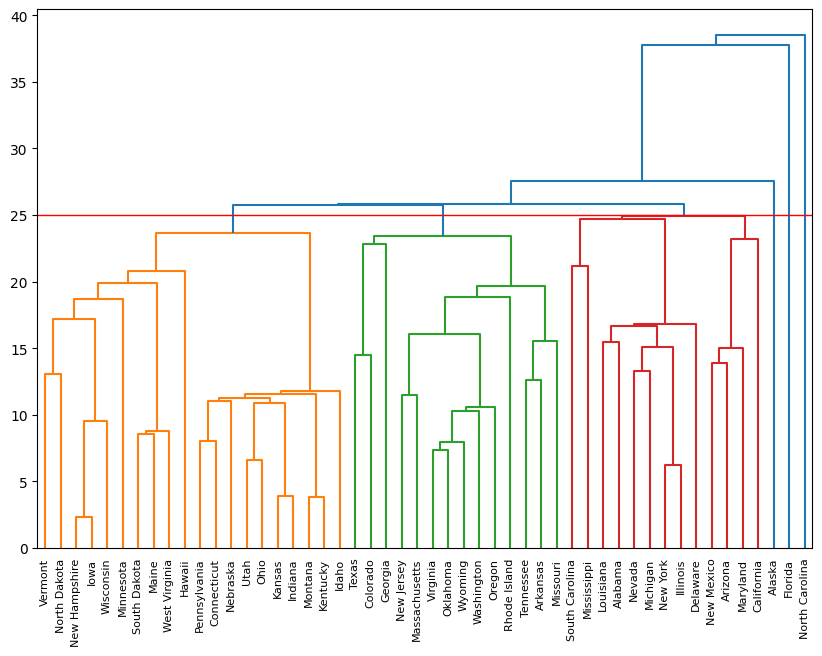

In [12]:
# 최단연결법
single = linkage(US.iloc[:,1::], metric = 'euclidean', method = 'single')

# 덴드로그램 
plt.figure(figsize = (10,7))
dendrogram(single, 
           orientation = 'top', 
           labels = labelList, 
           distance_sort = 'descending',
           color_threshold = 25, # 군집의 수를 설정하는 Height 값 설정
           show_leaf_counts = True)
plt.axhline(y=25, color = 'r', linewidth = 1) # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

# 25일 경우 군집이 6개 
# 아래 그림에서 가장 오른쪽 파란색 세로 3줄은 이상치로 판단.
# 군집의 거리가 멀수록 세로 길이가 길다.
# 아래 그림은 군집이 잘 분류되었다고 말하기 어렵다.

In [13]:
# state 마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(single, 25, 'distance') # distance 중요
assignments

array([1, 4, 1, 2, 1, 2, 3, 1, 5, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 6, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [16]:
US['cluster'] = assignments

In [17]:
US.head()

,State,Murder,Assault,UrbanPop,rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


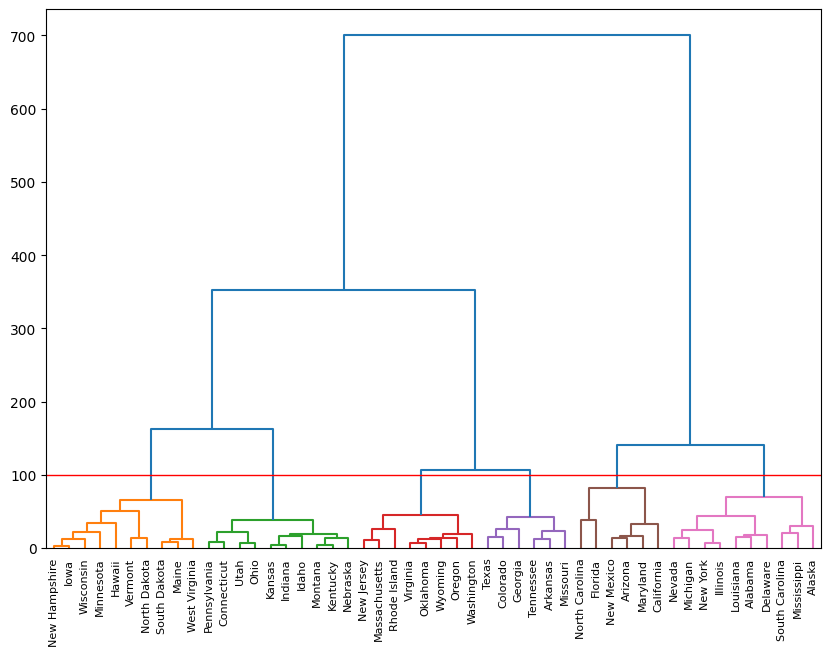

In [25]:
# 최장연결법
complete = linkage(US.iloc[:,1::], metric = 'euclidean', method = 'complete')

# 덴드로그램 
plt.figure(figsize = (10,7))
dendrogram(single, 
           orientation = 'top', 
           labels = labelList, 
           distance_sort = 'descending',
           color_threshold = 100, # 군집의 수를 설정하는 Height 값 설정
           show_leaf_counts = True)
plt.axhline(y=100, color = 'r', linewidth = 1) # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

In [ ]:
# 위는 군집이 잘 분류되었다
# 군집 내 요소 간 거리는 가깝고, 군집 간의 거리차이가 길기 때문이다.

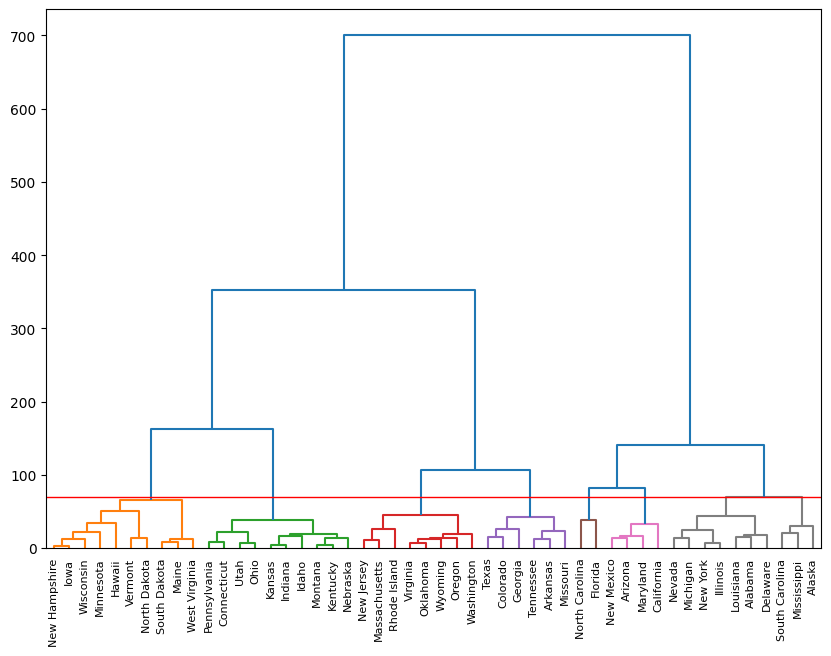

In [24]:
# 평균연결법
average = linkage(US.iloc[:,1::], metric = 'euclidean', method = 'average')

# 덴드로그램 
plt.figure(figsize = (10,7))
dendrogram(single, 
           orientation = 'top', 
           labels = labelList, 
           distance_sort = 'descending',
           color_threshold = 70, # 군집의 수를 설정하는 Height 값 설정
           show_leaf_counts = True)
plt.axhline(y=70, color = 'r', linewidth = 1) # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

# 최장연결법에 비해 3, 4번째 군집이 잘 분류 되었다.
# labelList의 순서는 다를 수 있다.

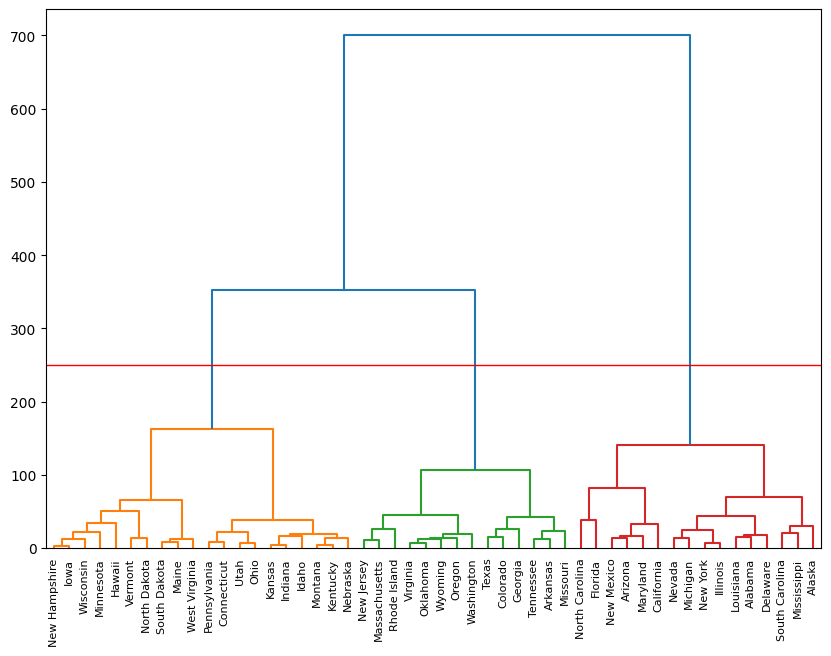

In [23]:
# 와드연결법
ward = linkage(US.iloc[:,1::], metric = 'euclidean', method = 'ward')

# 덴드로그램 
plt.figure(figsize = (10,7))
dendrogram(single, 
           orientation = 'top', 
           labels = labelList, 
           distance_sort = 'descending',
           color_threshold = 250, # 군집의 수를 설정하는 Height 값 설정
           show_leaf_counts = True)
plt.axhline(y=250, color = 'r', linewidth = 1) # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()
# 군집 내 객체들 간 가깝고, 군집 간 거리는 멀다.
# 와드연결법 추천 : 군집 내 오차는 최소화, 군집 간 길이는 최대화

In [26]:
assignments = fcluster(ward, 250, 'distance') # distance 중요
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [27]:
US['cluster'] = assignments

In [28]:
US.head()

,State,Murder,Assault,UrbanPop,rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [29]:
US.groupby('cluster').mean()

,Murder,Assault,UrbanPop,rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [ ]:
# 1번 집단은 범죄가 많이 일어난다.(고위험 지역)
# 2번 집단은 1번 집단보다는 아니지만 어느정도 일어난다.(보통)
# 3번 집단은 범죄가 적은 집단이다.(저위험 지역)